In [6]:
import pandas as pd
import re
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [7]:
df = pd.read_csv('data/complaints_10k.csv')
df.head()

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,2017-06-08,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",MD,21108,NaN,NaN,Postal mail,2017-06-09,Closed with explanation,Yes,NaN,2546268
1,1,2015-05-13,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,TD BANK US HOLDING COMPANY,NJ,08759,Older American,NaN,Phone,2015-05-14,Closed with monetary relief,Yes,No,1373196
2,2,2016-03-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,LA,710XX,"Older American, Servicemember",NaN,Phone,2016-03-01,Closed with explanation,Yes,No,1810934
3,3,2021-03-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"The following accounts are not mines, and is e...",NaN,"EQUIFAX, INC.",MO,NaN,NaN,Consent provided,Web,2021-03-01,Closed with explanation,Yes,NaN,4173045
4,4,2019-08-01,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I have submitted several disputes requesting V...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,NaN,NaN,Consent provided,Web,2019-08-01,Closed with explanation,Yes,NaN,3325520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    9992 non-null   int64 
 1   Date received                 9992 non-null   object
 2   Product                       9992 non-null   object
 3   Sub-product                   8983 non-null   object
 4   Issue                         9992 non-null   object
 5   Sub-issue                     7270 non-null   object
 6   Consumer complaint narrative  3485 non-null   object
 7   Company public response       4068 non-null   object
 8   Company                       9992 non-null   object
 9   State                         9803 non-null   object
 10  ZIP code                      8978 non-null   object
 11  Tags                          1223 non-null   object
 12  Consumer consent provided?    6848 non-null   object
 13  Submitted via     

In [9]:
df1 = df[['Consumer complaint narrative', 'Product']].copy()
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Consumer complaint narrative  3485 non-null   object
 1   Product                       9992 non-null   object
dtypes: object(2)
memory usage: 156.3+ KB


In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [11]:
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and digits
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return ' '.join(tokens)

df1['processed_narrative'] = df1['Consumer complaint narrative'].apply(preprocess_text)


In [12]:
df1['Product'].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    3703
Debt collection                                                                 1668
Mortgage                                                                        1461
Credit reporting                                                                 603
Credit card or prepaid card                                                      536
Checking or savings account                                                      445
Credit card                                                                      383
Bank account or service                                                          370
Student loan                                                                     273
Money transfer, virtual currency, or money service                               145
Consumer Loan                                                                    135
Vehicle loan or lease                                    

In [13]:
class_map = {
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Reporting, Credit Repair, Consumer Reports',
    'Credit reporting': 'Credit Reporting, Credit Repair, Consumer Reports',
    'Debt collection': 'Debt Collection',
    'Mortgage': 'Mortgage',
    'Credit card or prepaid card': 'Credit Card or Prepaid Card',
    'Credit card': 'Credit Card or Prepaid Card',
    'Prepaid card': 'Credit Card or Prepaid Card',
    'Checking or savings account': 'Checking or Savings Account',
    'Bank account or service': 'Checking or Savings Account',
    'Student loan': 'Student Loan',
    'Money transfer, virtual currency, or money service': 'Money Transfer or Virtual Currency',
    'Money transfers': 'Money Transfer or Virtual Currency',
    'Consumer Loan': 'Consumer Loan',
    'Payday loan, title loan, or personal loan': 'Consumer Loan',
    'Payday loan': 'Consumer Loan',
    'Vehicle loan or lease': 'Vehicle Loan or Lease',
    'Other financial service': 'Other Financial Service'
}
df1['product_grouped'] = df1['Product'].map(class_map)


In [14]:
df1['product_grouped'].value_counts()

product_grouped
Credit Reporting, Credit Repair, Consumer Reports    4306
Debt Collection                                      1668
Mortgage                                             1461
Credit Card or Prepaid Card                           935
Checking or Savings Account                           815
Student Loan                                          273
Consumer Loan                                         240
Money Transfer or Virtual Currency                    168
Vehicle Loan or Lease                                 122
Other Financial Service                                 4
Name: count, dtype: int64

In [15]:
x = df1['processed_narrative']
y = df1['product_grouped']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,           # 20% for test
    stratify=y,              # Keeps class distribution balanced
    random_state=42          # Ensures reproducibility
)

print(f"Train size: {len(x_train)}, Test size: {len(x_test)}")

Train size: 7993, Test size: 1999


In [17]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [18]:
# Check class distribution
from typing import Counter


print(Counter(y_train))


Counter({'Credit Reporting, Credit Repair, Consumer Reports': 3445, 'Debt Collection': 1334, 'Mortgage': 1169, 'Credit Card or Prepaid Card': 748, 'Checking or Savings Account': 652, 'Student Loan': 218, 'Consumer Loan': 192, 'Money Transfer or Virtual Currency': 134, 'Vehicle Loan or Lease': 98, 'Other Financial Service': 3})


In [19]:
# Resample
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train.values.reshape(-1,1), y_train)
x_train_resampled = x_train_resampled.flatten()


In [20]:
# Vectorize
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
x_train_tfidf = tfidf.fit_transform(x_train_resampled)
x_test_tfidf = tfidf.transform(x_test)


In [21]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)
lr.fit(x_train_tfidf, y_train_resampled)


d:\MCCNLP\mccenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [22]:
# Predict & evaluate
y_pred = lr.predict(x_test_tfidf)
print(classification_report(y_test, y_pred))


                                                   precision    recall  f1-score   support

                      Checking or Savings Account       0.71      0.22      0.34       163
                                    Consumer Loan       0.43      0.12      0.19        48
                      Credit Card or Prepaid Card       0.66      0.25      0.36       187
Credit Reporting, Credit Repair, Consumer Reports       0.90      0.28      0.43       861
                                  Debt Collection       0.77      0.33      0.46       334
               Money Transfer or Virtual Currency       0.72      0.38      0.50        34
                                         Mortgage       0.21      0.99      0.34       292
                          Other Financial Service       0.00      0.00      0.00         1
                                     Student Loan       0.70      0.25      0.37        55
                            Vehicle Loan or Lease       0.60      0.25      0.35        2

d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [23]:
from collections import Counter

# Check distribution of classes in training set
class_counts = Counter(y_train)
print("Class distribution in training set:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

Class distribution in training set:
Credit Card or Prepaid Card: 748
Mortgage: 1169
Checking or Savings Account: 652
Credit Reporting, Credit Repair, Consumer Reports: 3445
Debt Collection: 1334
Student Loan: 218
Consumer Loan: 192
Money Transfer or Virtual Currency: 134
Vehicle Loan or Lease: 98
Other Financial Service: 3


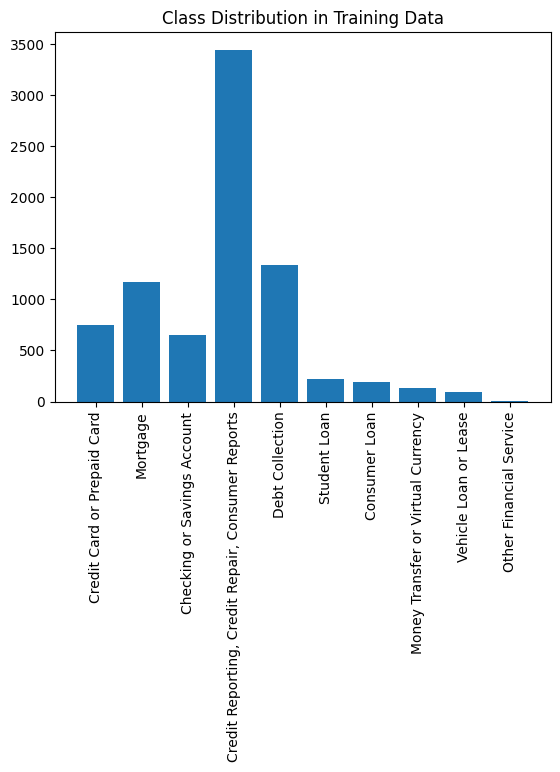

In [24]:
# Optional: visualize distribution
import matplotlib.pyplot as plt

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title('Class Distribution in Training Data')
plt.show()

In [25]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(
    x_train.values.reshape(-1, 1), y_train)
X_train_resampled = x_train_resampled.flatten()


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# TF-IDF feature extraction
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train_resampled)
X_test_tfidf = tfidf.transform(x_test)


In [27]:
# Baseline classification
clf = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
clf.fit(x_train_tfidf, y_train_resampled)
y_pred = clf.predict(x_test_tfidf)


d:\MCCNLP\mccenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [28]:
# Evaluate
print(classification_report(y_test, y_pred))


                                                   precision    recall  f1-score   support

                      Checking or Savings Account       0.71      0.22      0.34       163
                                    Consumer Loan       0.43      0.12      0.19        48
                      Credit Card or Prepaid Card       0.66      0.25      0.36       187
Credit Reporting, Credit Repair, Consumer Reports       0.90      0.28      0.43       861
                                  Debt Collection       0.77      0.33      0.46       334
               Money Transfer or Virtual Currency       0.72      0.38      0.50        34
                                         Mortgage       0.21      0.99      0.34       292
                          Other Financial Service       0.00      0.00      0.00         1
                                     Student Loan       0.70      0.25      0.37        55
                            Vehicle Loan or Lease       0.60      0.25      0.35        2

d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


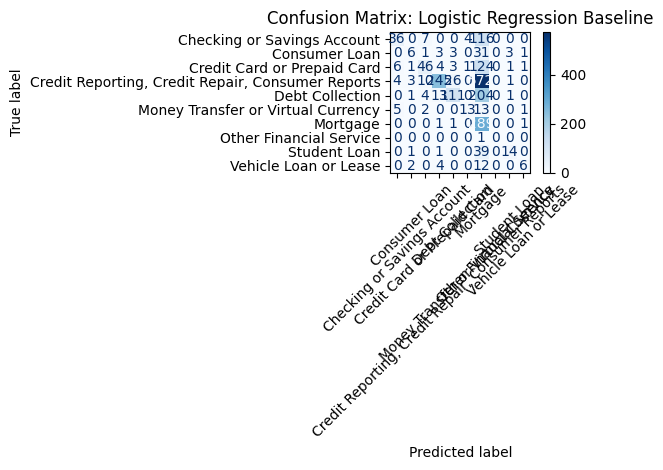

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix: Logistic Regression Baseline")
plt.tight_layout()
plt.show()


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))


                                                   precision    recall  f1-score   support

                      Checking or Savings Account      0.706     0.221     0.336       163
                                    Consumer Loan      0.429     0.125     0.194        48
                      Credit Card or Prepaid Card      0.657     0.246     0.358       187
Credit Reporting, Credit Repair, Consumer Reports      0.904     0.285     0.433       861
                                  Debt Collection      0.771     0.332     0.464       334
               Money Transfer or Virtual Currency      0.722     0.382     0.500        34
                                         Mortgage      0.206     0.990     0.341       292
                          Other Financial Service      0.000     0.000     0.000         1
                                     Student Loan      0.700     0.255     0.373        55
                            Vehicle Loan or Lease      0.600     0.250     0.353        2

d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [31]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder


In [32]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_resampled)
y_test_enc = le.transform(y_test)


In [33]:
def tokenize(texts):
    return tokenizer(list(texts), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Flatten x_train_resampled to a 1D list of strings
train_encodings = tokenize(x_train_resampled.flatten())
test_encodings = tokenize(list(x_test))


In [34]:
import torch


class ComplaintDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)


In [35]:
train_dataset = ComplaintDataset(train_encodings, y_train_enc)
test_dataset = ComplaintDataset(test_encodings, y_test_enc)


In [ ]:
# from transformers import TrainingArguments

# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=3,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     evaluation_strategy="epoch"  # this is the modern way
# )


Note: you may need to restart the kernel to use updated packages.


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluate_during_training'

In [36]:
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    TrainingArguments,
    Trainer
)
import torch


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_resampled)  # Or y_train, if not resampled
num_classes = len(le.classes_)

model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=num_classes
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
# 1. Load tokenizer and model
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(le.classes_)   # your label encoder’s number of classes
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
df['label'] = le.fit_transform(df['Product'])


In [41]:
from datasets import Dataset

# Use the indices from your existing train/test split
train_df = df.loc[x_train.index]
eval_df = df.loc[x_test.index]

train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)


In [43]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize(batch):
    # Fill missing values with empty string
    texts = [t if t is not None else "" for t in batch["Consumer complaint narrative"]]
    return tokenizer(
        texts,
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_dataset = train_dataset.map(tokenize, batched=True)
eval_dataset = eval_dataset.map(tokenize, batched=True)


Map: 100%|██████████| 1999/1999 [00:00<00:00, 4742.43 examples/s]


In [44]:
train_dataset.set_format(
    "torch",
    columns=['input_ids', 'attention_mask', 'label']
)
eval_dataset.set_format(
    "torch",
    columns=['input_ids', 'attention_mask', 'label']
)


In [47]:
from datasets import Dataset
from transformers import DistilBertTokenizerFast

# Use the existing train/test DataFrames from your notebook
df_train = train_df
df_eval = eval_df

# If your label column isn't already numeric, encode it:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['Product'])
df_eval['label'] = le.transform(df_eval['Product'])

# Convert pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(df_train)
eval_dataset = Dataset.from_pandas(df_eval)

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_function(batch):
    # Fill missing values with empty string
    texts = [t if t is not None else "" for t in batch["Consumer complaint narrative"]]
    return tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=128
    )

# Tokenize with map (processes the full dataset efficiently)
train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch: keep only the relevant columns
columns = ['input_ids', 'attention_mask', 'label']
train_dataset.set_format(type='torch', columns=columns)
eval_dataset.set_format(type='torch', columns=columns)


Map: 100%|██████████| 1999/1999 [00:00<00:00, 4499.27 examples/s]


In [57]:
import torch
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification
from torch.optim import AdamW

# ---------------------
# CONFIGURATION SECTION
# ---------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

# Ensure your train_dataset has zero-based labels
# e.g., df_train['label'] = le.transform(df_train['Product'])

num_classes = len(set(train_dataset['label']))  # or len(le.classes_)
print(f"[INFO] num_classes = {num_classes}")

# ---------------------
# MODEL INITIALIZATION
# ---------------------
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=num_classes
)
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# ---------------------
# TRAINING LOOP
# ---------------------
model.train()
for epoch in range(3):
    total_loss = 0.0
    for step, batch in enumerate(train_loader):
        labels = batch['label']

        # Defensive check — remove after you’re sure your labels are correct
        if labels.max() >= num_classes or labels.min() < 0:
            bad = labels[ (labels >= num_classes) | (labels < 0) ]
            raise ValueError(f"[ERROR] Out-of-range labels found: {bad}")

        # Push inputs + labels to device
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'label'}
        labels = labels.to(device)

        # Forward + Backward pass
        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if step % 50 == 0:
            print(f"[EPOCH {epoch+1} | STEP {step}] loss = {loss.item():.4f}")

    avg_loss = total_loss / len(train_loader)
    print(f"[EPOCH {epoch+1}] Average training loss: {avg_loss:.4f}")

# ---------------------
# EVALUATION LOOP (OPTIONAL)
# ---------------------
# Put your validation loader here and compute metrics manually
# model.eval()
# with torch.no_grad():
#     for batch in val_loader:
#         ...


[INFO] Using device: cpu
[INFO] num_classes = 7993


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[EPOCH 1 | STEP 0] loss = 8.9652
[EPOCH 1 | STEP 50] loss = 3.7766
[EPOCH 1 | STEP 100] loss = 2.4456
[EPOCH 1 | STEP 150] loss = 2.3084
[EPOCH 1 | STEP 200] loss = 1.8963
[EPOCH 1 | STEP 250] loss = 1.9412
[EPOCH 1 | STEP 300] loss = 1.7146
[EPOCH 1 | STEP 350] loss = 1.9787
[EPOCH 1 | STEP 400] loss = 1.4793
[EPOCH 1 | STEP 450] loss = 2.0207
[EPOCH 1] Average training loss: 2.5143
[EPOCH 2 | STEP 0] loss = 1.9442
[EPOCH 2 | STEP 50] loss = 1.7358
[EPOCH 2 | STEP 100] loss = 1.4039
[EPOCH 2 | STEP 150] loss = 1.6654
[EPOCH 2 | STEP 200] loss = 1.3329
[EPOCH 2 | STEP 250] loss = 1.6592
[EPOCH 2 | STEP 300] loss = 2.0468
[EPOCH 2 | STEP 350] loss = 2.0884
[EPOCH 2 | STEP 400] loss = 1.9031
[EPOCH 2 | STEP 450] loss = 2.0842
[EPOCH 2] Average training loss: 1.7254
[EPOCH 3 | STEP 0] loss = 1.4196
[EPOCH 3 | STEP 50] loss = 1.4999
[EPOCH 3 | STEP 100] loss = 1.9415
[EPOCH 3 | STEP 150] loss = 1.7424
[EPOCH 3 | STEP 200] loss = 1.4141
[EPOCH 3 | STEP 250] loss = 1.8995
[EPOCH 3 | STEP 300

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import DataLoader

# Create DataLoader for eval_dataset
val_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'label'}
        labels = batch['label'].to(device)
        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Accuracy:", accuracy_score(all_labels, all_preds))
print(classification_report(all_labels, all_preds))
 

Accuracy: 0.4747373686843422
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.48      0.32      0.39        90
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        84
           4       0.62      0.24      0.35       100
           5       0.00      0.00      0.00       126
           6       0.43      0.97      0.60       735
           7       0.78      0.25      0.38       334
           8       0.50      0.31      0.38        32
           9       0.00      0.00      0.00         2
          10       0.88      0.25      0.39       292
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         5
          13       0.09      0.09      0.09        11
          14       0.00      0.00      0.00         3
          15       0.77      0.18      0.29        55
          16       0.39      0.29      0.33        2

d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# model.save_pretrained("./your_model_directory")
model.save_pretrained("./bert_model")       # Saves model weights and config to folder bert_model/
tokenizer.save_pretrained("./bert_tokenizer")  # Similarly, save tokenizer files




('./bert_tokenizer\\tokenizer_config.json',
 './bert_tokenizer\\special_tokens_map.json',
 './bert_tokenizer\\vocab.txt',
 './bert_tokenizer\\added_tokens.json',
 './bert_tokenizer\\tokenizer.json')

In [61]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

model = DistilBertForSequenceClassification.from_pretrained("./bert_model")
tokenizer = DistilBertTokenizerFast.from_pretrained("./bert_tokenizer")


In [62]:
model.save_pretrained("./saved_bert_model")
tokenizer.save_pretrained("./saved_bert_tokenizer")


('./saved_bert_tokenizer\\tokenizer_config.json',
 './saved_bert_tokenizer\\special_tokens_map.json',
 './saved_bert_tokenizer\\vocab.txt',
 './saved_bert_tokenizer\\added_tokens.json',
 './saved_bert_tokenizer\\tokenizer.json')

In [63]:
from sklearn.metrics import classification_report, accuracy_score
import torch

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:   # your validation DataLoader
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'label'}
        labels = batch['label'].to(device)
        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Accuracy:", accuracy_score(all_labels, all_preds))
print(classification_report(all_labels, all_preds))


Accuracy: 0.4747373686843422
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.48      0.32      0.39        90
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        84
           4       0.62      0.24      0.35       100
           5       0.00      0.00      0.00       126
           6       0.43      0.97      0.60       735
           7       0.78      0.25      0.38       334
           8       0.50      0.31      0.38        32
           9       0.00      0.00      0.00         2
          10       0.88      0.25      0.39       292
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         5
          13       0.09      0.09      0.09        11
          14       0.00      0.00      0.00         3
          15       0.77      0.18      0.29        55
          16       0.39      0.29      0.33        2

d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\MCCNLP\mccenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


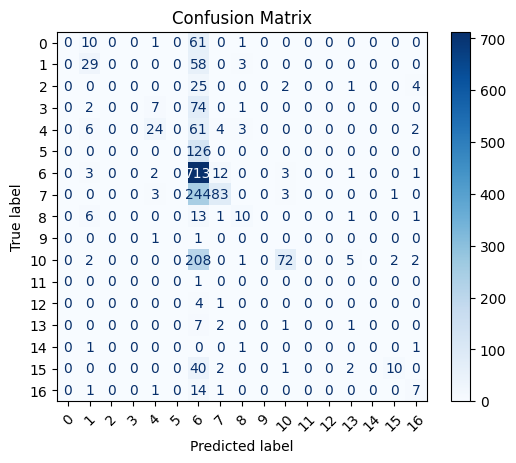

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()


In [65]:
model.save_pretrained("./saved_bert_model")
tokenizer.save_pretrained("./saved_bert_tokenizer")


('./saved_bert_tokenizer\\tokenizer_config.json',
 './saved_bert_tokenizer\\special_tokens_map.json',
 './saved_bert_tokenizer\\vocab.txt',
 './saved_bert_tokenizer\\added_tokens.json',
 './saved_bert_tokenizer\\tokenizer.json')

In [66]:
print(all_labels)

[np.int64(6), np.int64(6), np.int64(6), np.int64(7), np.int64(10), np.int64(6), np.int64(10), np.int64(0), np.int64(6), np.int64(7), np.int64(6), np.int64(7), np.int64(10), np.int64(5), np.int64(10), np.int64(6), np.int64(4), np.int64(7), np.int64(8), np.int64(13), np.int64(7), np.int64(5), np.int64(10), np.int64(6), np.int64(6), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(6), np.int64(6), np.int64(6), np.int64(7), np.int64(6), np.int64(6), np.int64(1), np.int64(6), np.int64(6), np.int64(5), np.int64(6), np.int64(4), np.int64(6), np.int64(8), np.int64(7), np.int64(7), np.int64(7), np.int64(6), np.int64(10), np.int64(5), np.int64(5), np.int64(6), np.int64(7), np.int64(10), np.int64(16), np.int64(6), np.int64(6), np.int64(6), np.int64(6), np.int64(0), np.int64(7), np.int64(6), np.int64(6), np.int64(3), np.int64(6), np.int64(1), np.int64(6), np.int64(7), np.int64(6), np.int64(1), np.int64(4), np.int64(6), np.int64(7), np.int64(10), np.int64(6), np.int64(4), np.int64(0), n

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Product'])
id2department = {idx: label for idx, label in enumerate(le.classes_)}


In [69]:
from transformers import DistilBertConfig, DistilBertForSequenceClassification

num_classes = 10

config = DistilBertConfig.from_pretrained('distilbert-base-uncased', num_labels=num_classes)
model = DistilBertForSequenceClassification(config)

import os

checkpoint_path = 'path_to_your_old_checkpoint.bin'  # <-- Change this to your actual checkpoint path

if os.path.exists(checkpoint_path):
    # Load backbone weights except classification head
    state_dict = torch.load(checkpoint_path)

    # Remove classification head weights from state dict
    keys_to_remove = [k for k in state_dict.keys() if 'classifier' in k]

    for k in keys_to_remove:
        state_dict.pop(k)

    # Load remaining weights strictly False to ignore missing keys
    model.load_state_dict(state_dict, strict=False)
else:
    print(f"Checkpoint file not found: {checkpoint_path}. Model will be randomly initialized.")

model.to(device)


Checkpoint file not found: path_to_your_old_checkpoint.bin. Model will be randomly initialized.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
